In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,8)}) 

# load datasets

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [2]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,6,no


# Drawing Conclusions
Use the space below to address questions on datasets 

### Q1: Are more unique models using alternative sources of fuel? By how much?
Let's first look at what the sources of fuel are and which ones are alternative sources.

In [3]:
df_08.fuel.value_counts()

Gasoline    984
gas           1
ethanol       1
CNG           1
Name: fuel, dtype: int64

In [4]:
df_18.fuel.value_counts()

Gasoline       987
Gas             40
Ethanol         40
Diesel          23
Electricity     16
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. (You can use Google if you weren't sure which ones are alternative sources of fuel!)

In [5]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]')['model'].nunique()
alt_08

2

In [6]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

33

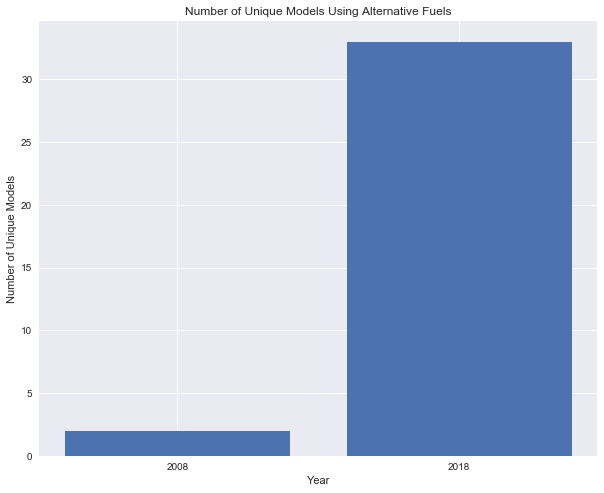

In [7]:
x_name = ['2008', '2018']
x = np.arange(len(x_name))
y = [alt_08, alt_18]
plt.bar(x,y);
plt.xticks(x, x_name);
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

[plot a bar chart using matplotlib - type error](https://stackoverflow.com/a/45894655)

Since 2008, the number of unique models using alternative sources of fuel increased by 31. We can also look at proportions.

In [8]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 483)

In [9]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.06832298136645963)

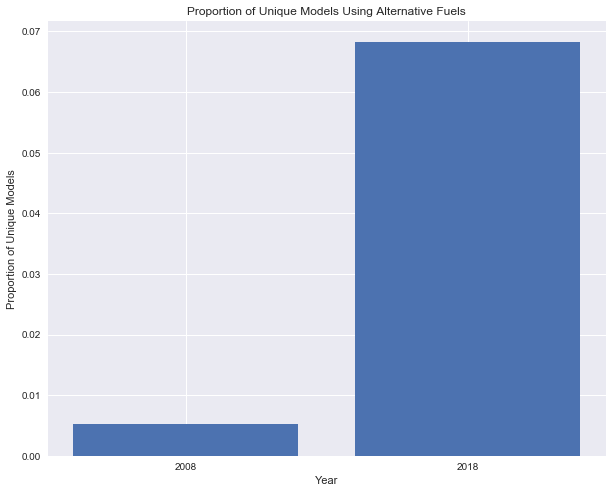

In [10]:
x_name = ['2008', '2018']
x = np.arange(len(x_name))
y = [prop_08, prop_18]
plt.bar(x,y);
plt.xticks(x, x_name);
plt.title("Proportion of Unique Models Using Alternative Fuels");
plt.xlabel("Year");
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

Let's look at the average fuel economy for each vehicle class for both years.

In [11]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [12]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.890909
midsize car        27.761364
minivan            30.000000
pickup             18.027027
small SUV          23.829412
small car          25.537190
special purpose    19.214286
standard SUV       18.770642
station wagon      29.023256
van                16.000000
Name: cmb_mpg, dtype: float64

In [13]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                      NaN
large car           5.381818
midsize car         6.159914
minivan            10.882353
pickup              1.749919
small SUV                NaN
small car           4.432085
special purpose          NaN
standard SUV             NaN
station wagon       6.656589
van                 1.047619
Name: cmb_mpg, dtype: float64

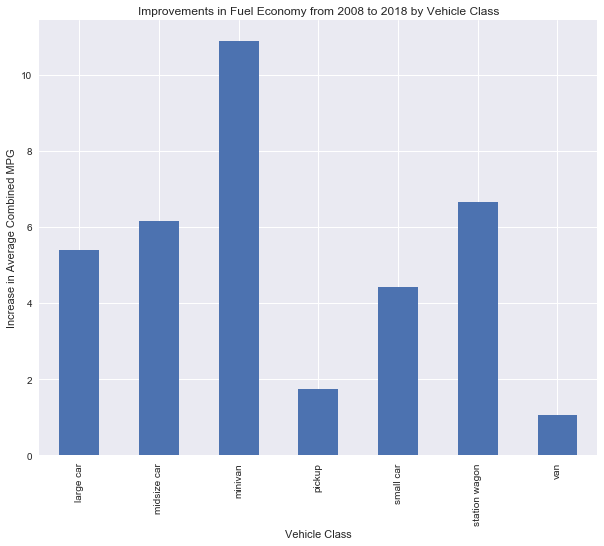

In [16]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
# plt.subplots(figsize=(8, 5))
inc.plot(kind='bar')
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class');
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?
We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [17]:
# smartway labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [18]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [19]:
# explore smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,4.636842
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,1.750902
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,1.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,3.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,5.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,6.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


Use what you've learned so for to further explore this dataset on 2008 smartway vehicles.

In [20]:
# smartway labels for 2018
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [21]:
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [22]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,1.788820,3.981366,5.186335,35.372671,41.583851,37.677019,7.987578
std,0.459755,0.453763,1.827584,15.898829,12.246713,14.087939,1.161828
min,1.000000,3.000000,3.000000,23.000000,25.000000,24.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.600000,4.000000,5.000000,29.000000,38.000000,32.000000,8.000000
75%,2.000000,4.000000,7.000000,33.000000,41.000000,36.000000,9.000000
max,3.600000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


Use what you've learned so for to further explore this dataset on 2018 smartway vehicles.

### Q4: What features are associated with better fuel economy?
You can explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [23]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,4.660886
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,1.669807
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,1.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,4.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,5.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,6.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [24]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,1.945902,4.037471,4.878220,28.199063,35.770492,31.035129,6.454333
std,0.432376,0.478163,1.849799,11.462337,9.090767,10.303433,1.467855
min,1.000000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,34.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,37.000000,32.000000,7.000000
max,3.600000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?
This is a question regarding models that were updated since 2008 and still being produced in 2018. In order to do this, we need a way to compare models that exist in both datasets. To do this, let's first learn about merges.